다항 회귀와 다중 회귀의 차이점
다항 회귀는 특성하나를 여러개의 항으로 만들는 것이고
다중 회귀는 특성 여러개를 사용하여 회귀 하는 것이다.
예로 들어서 다항 회귀는 특성을 여러개의 항으로 만든다고 치고 그래프를 그릴때 2차원으로 표현이 가능하지만
다중 회귀는 특성하나당 하나의 차원을 차지하므로 특성이 여러개일 수록 차원이 계속늘어나 다차원을 띄는 성격의 그래프가 그려진다.

In [1]:
import pandas as pd
df =pd.read_csv('http://bit.ly/perch_csv_data')
perch_full=df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_full,perch_weight,random_state=42)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
poly.fit_transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

In [5]:
poly=PolynomialFeatures(include_bias=False)
poly.fit_transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [6]:
poly=PolynomialFeatures(include_bias=False)
train_poly=poly.fit_transform(train_input)
train_poly.shape

(42, 9)

In [7]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [8]:
test_poly = poly.transform(test_input)

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly,train_target)
lr.score(train_poly,train_target)

0.9903183436982125

In [10]:
lr.score(test_poly,test_target)

0.9714559911594111

In [11]:
poly=PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
train_poly.shape

(42, 55)

In [12]:
lr.fit(train_poly,train_target)
lr.score(train_poly,train_target)

0.9999999999996433

In [13]:
lr.score(test_poly,test_target)

-144.40579436844948

과대 적합이 일어났음
-샘플이 42개인데 특성이 55개니까 당연히 훈련에 대해서 완벽하게 학습할 수 있기때문에 훈련 데이터에서는 높은 점수를 얻지만 테스트 데이터에서는 낮은 점수받을 수 밖에 없음


In [14]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

In [15]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled,train_target)

0.9896101671037343

In [16]:
ridge.score(test_scaled,test_target)

0.9790693977615387

In [17]:
import matplotlib.pyplot as plt
train_score =[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  ridge=Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled,test_target))

Text(0, 0.5, 'R^2')

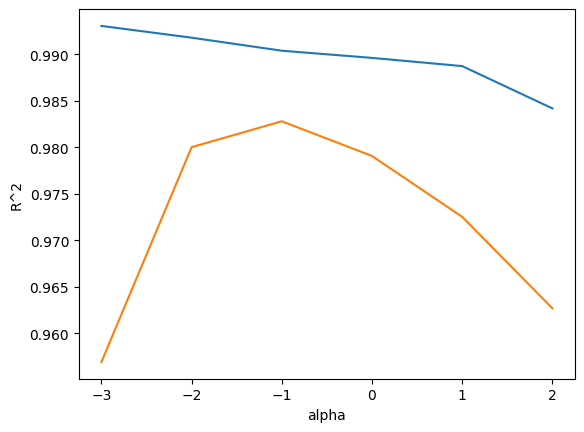

In [18]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel("R^2")


In [19]:
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)
ridge.score(test_scaled, test_target)

0.9827976465386928

In [21]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.989789897208096

In [22]:
lasso.score(test_scaled,test_target)

0.9800593698421883

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'lasso')

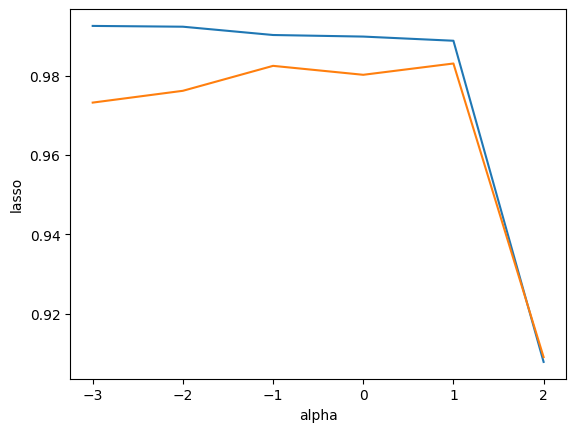

In [25]:
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  lasso=Lasso(alpha=alpha,max_iter=10000)
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel("alpha")
plt.ylabel('lasso')

In [27]:
lasso=Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
np.sum(lasso.coef_==0)

40

In [29]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        , 12.14852453, 55.44856399,
       42.23100799,  0.        ,  0.        , 13.70596191,  0.        ,
       43.2185952 ,  5.7033775 , 47.46254536,  7.42309425, 11.85823365,
        0.        ,  0.        , 13.53038193, 21.22111356,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       18.66993032,  0.        ,  0.        ,  0.        , 15.81041778,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 18.14672268,
        0.        ,  0.        ,  0.        ,  0.        , 15.51272953,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])